### https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/quickstarts/python-disk

In [1]:
import os
import sys
import requests
# If you are using a Jupyter notebook, uncomment the following line.
# %matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [2]:
subscription_key = 'e6a8b2a993a04ec5aee19d8d890911ab'
endpoint = 'https://nabila-cv.cognitiveservices.azure.com/'
analyze_url = endpoint + "vision/v3.1/analyze"

In [ ]:
# Add your Computer Vision subscription key and endpoint to your environment variables.
if 'COMPUTER_VISION_SUBSCRIPTION_KEY' in os.environ:
    subscription_key = os.environ['COMPUTER_VISION_SUBSCRIPTION_KEY']
else:
    print("\nSet the COMPUTER_VISION_SUBSCRIPTION_KEY environment variable.\n**Restart your shell or IDE for changes to take effect.**")
    sys.exit()

if 'COMPUTER_VISION_ENDPOINT' in os.environ:
    endpoint = os.environ['COMPUTER_VISION_ENDPOINT']

analyze_url = endpoint + "vision/v3.1/analyze"

In [9]:
!ls

LICENSE
README.MD
__pycache__
app
app.py
azure
env
hackathon_notes.MD
img_classification_cognitiveservices_cv.ipynb
mid_life_produce
notes.MD
recommender
requirements.txt
static
templates
venv
vision


In [35]:
# Set image_path to the local path of an image that you want to analyze.
# Sample images are here, if needed:
# https://github.com/Azure-Samples/cognitive-services-sample-data-files/tree/master/ComputerVision/Images
image_path = "banana.jpg"

# Read the image into a byte array
image_data = open(image_path, "rb").read()
headers = {'Ocp-Apim-Subscription-Key': subscription_key,
           'Content-Type': 'application/octet-stream'}
params = {'visualFeatures': 'Categories,Description,Color'}
response = requests.post(
    analyze_url, headers=headers, params=params, data=image_data)
response.raise_for_status()

{'categories': [{'name': 'food_bread', 'score': 0.94921875}], 'color': {'dominantColorForeground': 'Brown', 'dominantColorBackground': 'Brown', 'dominantColors': ['Brown'], 'accentColor': 'BE900D', 'isBwImg': False, 'isBWImg': False}, 'description': {'tags': ['banana', 'table', 'wooden', 'fruit', 'wood'], 'captions': [{'text': 'a bunch of bananas', 'confidence': 0.5032608509063721}]}, 'requestId': 'b02404e1-d2eb-48cd-9f9e-dd0f868f3d0d', 'metadata': {'height': 667, 'width': 1000, 'format': 'Jpeg'}}


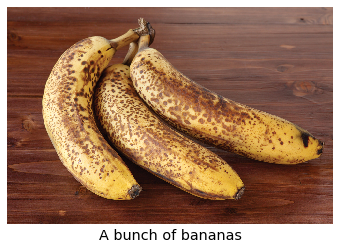

In [36]:
# The 'analysis' object contains various fields that describe the image. The most
# relevant caption for the image is obtained from the 'description' property.
analysis = response.json()
print(analysis)
image_caption = analysis["description"]["captions"][0]["text"].capitalize()

# Display the image and overlay it with the caption.
image = Image.open(BytesIO(image_data))
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)
plt.show()

In [34]:
(analysis)['description']['tags'][0]

'banana'

In [30]:
analysis.keys()

dict_keys(['categories', 'color', 'description', 'requestId', 'metadata'])

In [ ]:
tags_result_remote = computervision_client.tag_image(remote_image_url )
